# Notebook for final analysis

## Import necessary libraries

In [33]:
import pandas as pd
from data.data_functions import *
from simulation.simulation_models import *
from optimization.optimization import *

## Henter nødvendige dataset

### Historisk data

In [34]:
path = "./data/fin_hf_datagrunnlag.xlsx"
fin_data_hist = datalast_behandling(path)
fin_data_hist.head(10)

,År,Måned,Dato,Antall inn på post,Antall pasienter ut av Post,Belegg pr. dag,Antall liggedogn,Senger normert,Beleggsprosent,Gjennomsnitts belegg,Antall senger i bruk,post,helg
0,2022,januar,2022-01-01,3,3,22.291667,22,33,0.675505,22.291667,33,medisinsk,1
1,2022,januar,2022-01-01,2,0,12.625000,12,22,0.742647,12.625000,17,kirurgisk,1
2,2022,januar,2022-01-02,10,6,25.416667,23,33,0.770202,25.416667,33,medisinsk,1
3,2022,januar,2022-01-02,5,3,14.625000,13,22,0.860294,14.625000,17,kirurgisk,1
4,2022,januar,2022-01-03,5,3,27.916667,27,33,0.845960,27.916667,33,medisinsk,0
5,2022,januar,2022-01-03,7,4,16.166667,16,22,0.734848,16.166667,22,kirurgisk,0
6,2022,januar,2022-01-04,11,6,28.583333,27,33,0.866162,28.583333,33,medisinsk,0
7,2022,januar,2022-01-04,4,4,18.458333,17,22,0.839015,18.458333,22,kirurgisk,0
8,2022,januar,2022-01-05,12,20,32.250000,33,33,0.977273,32.250000,33,medisinsk,0
9,2022,januar,2022-01-05,12,10,20.541667,18,22,0.933712,20.541667,22,kirurgisk,0


### Predikerte data

In [35]:
path_pred = "./forecasting/excel_models/fin_hf_prediksjoner.xlsx"
forecasted_demand = create_forecast_dataset(path_pred)
forecasted_demand.head(10)

,År,Måned,Dato,Antall inn på post,Belegg pr. dag,Prediksjoner pasientstrøm,Prediksjoner belegg,post,helg
2034,2024,10,2024-10-14,NaN,NaN,7.0,14.0,kirurgisk,0
2035,2024,10,2024-10-14,NaN,NaN,8.0,23.0,medisinsk,0
2036,2024,10,2024-10-15,NaN,NaN,5.0,15.0,kirurgisk,0
2037,2024,10,2024-10-15,NaN,NaN,8.0,24.0,medisinsk,0
2038,2024,10,2024-10-16,NaN,NaN,5.0,15.0,kirurgisk,0
2039,2024,10,2024-10-16,NaN,NaN,7.0,25.0,medisinsk,0
2040,2024,10,2024-10-17,NaN,NaN,7.0,25.0,medisinsk,0
2041,2024,10,2024-10-17,NaN,NaN,6.0,14.0,kirurgisk,0
2042,2024,10,2024-10-18,NaN,NaN,9.0,21.0,medisinsk,0
2043,2024,10,2024-10-18,NaN,NaN,3.0,11.0,kirurgisk,0


In [36]:
fin_data = pd.concat([fin_data_hist, forecasted_demand], axis=0).sort_values("Dato").reset_index()
fin_data.drop(["index"], axis=1, inplace=True)
fin_data.head(10)

,År,Måned,Dato,Antall inn på post,Antall pasienter ut av Post,Belegg pr. dag,Antall liggedogn,Senger normert,Beleggsprosent,Gjennomsnitts belegg,Antall senger i bruk,post,helg,Prediksjoner pasientstrøm,Prediksjoner belegg
0,2022,januar,2022-01-01,3.0,3.0,22.291667,22.0,33.0,0.675505,22.291667,33.0,medisinsk,1,NaN,NaN
1,2022,januar,2022-01-01,2.0,0.0,12.625000,12.0,22.0,0.742647,12.625000,17.0,kirurgisk,1,NaN,NaN
2,2022,januar,2022-01-02,10.0,6.0,25.416667,23.0,33.0,0.770202,25.416667,33.0,medisinsk,1,NaN,NaN
3,2022,januar,2022-01-02,5.0,3.0,14.625000,13.0,22.0,0.860294,14.625000,17.0,kirurgisk,1,NaN,NaN
4,2022,januar,2022-01-03,5.0,3.0,27.916667,27.0,33.0,0.845960,27.916667,33.0,medisinsk,0,NaN,NaN
5,2022,januar,2022-01-03,7.0,4.0,16.166667,16.0,22.0,0.734848,16.166667,22.0,kirurgisk,0,NaN,NaN
6,2022,januar,2022-01-04,11.0,6.0,28.583333,27.0,33.0,0.866162,28.583333,33.0,medisinsk,0,NaN,NaN
7,2022,januar,2022-01-04,4.0,4.0,18.458333,17.0,22.0,0.839015,18.458333,22.0,kirurgisk,0,NaN,NaN
8,2022,januar,2022-01-05,12.0,20.0,32.250000,33.0,33.0,0.977273,32.250000,33.0,medisinsk,0,NaN,NaN
9,2022,januar,2022-01-05,12.0,10.0,20.541667,18.0,22.0,0.933712,20.541667,22.0,kirurgisk,0,NaN,NaN


### Optimaliseringsdata

In [26]:
data_opt = opt_dataset(fin_data, "medisinsk", year=2023)
data_opt.head(10)

,Dato,Antall inn på post,Belegg pr. dag
0,2023-01-02,10.0,27.208333
1,2023-01-03,7.0,25.166667
2,2023-01-04,16.0,25.458333
3,2023-01-05,6.0,28.875000
4,2023-01-06,6.0,24.916667
5,2023-01-09,5.0,20.041667
6,2023-01-10,15.0,24.958333
7,2023-01-11,9.0,27.958333
8,2023-01-12,11.0,26.166667
9,2023-01-13,5.0,20.500000


# Tilbudsiden

## Optimeringsmodell for optimalt bemanningsnivå

### Setting parameters

In [27]:
df_index = data_opt.Dato
demand = data_opt["Antall inn på post"] + round(data_opt["Belegg pr. dag"])
MaxStaff = 30
PPS = 4
availability = 20
ServiceLevel = 0.8

## Scenarioer: 1) Helligdager og offentlige eventer, 2) Høytider, 3) Ulykke, 4) Krig
# Her må det legges til endring i pasientstrøm og belegg pr. dag i functionene direkte, pluss endring i MaxStaff, PPS, availability og service_level
# for å simulere de ulike scenarioene  

### Creating model and result

In [28]:
model = labor_scheduling(df_index, demand, MaxStaff, PPS, availability, ServiceLevel)
result, status, obj, staff_allocated = optimize_staffing(model)
data_opt["staff_allocated"] = staff_allocated
display(data_opt)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write C:\Users\Consumer\AppData\Local\Temp\tmppcukdgog.glpk.raw --wglp
 C:\Users\Consumer\AppData\Local\Temp\tmpd_wllmd2.glpk.glp --cpxlp C:\Users\Consumer\AppData\Local\Temp\tmpcbv5ewlj.pyomo.lp
Reading problem data from 'C:\Users\Consumer\AppData\Local\Temp\tmpcbv5ewlj.pyomo.lp'...
780 rows, 260 columns, 780 non-zeros
260 integer variables, none of which are binary
3910 lines were read
Writing problem data to 'C:\Users\Consumer\AppData\Local\Temp\tmpd_wllmd2.glpk.glp'...
3123 lines were written
GLPK Integer Optimizer 5.0
780 rows, 260 columns, 780 non-zeros
260 integer variables, none of which are binary
Preprocessing...
Objective value =   1.867000000e+03
INTEGER OPTIMAL SOLUTION FOUND BY MIP PREPROCESSOR
Time used:   0.0 secs
Memory used: 0.4 Mb (395764 bytes)
Writing MIP solution to 'C:\Users\Consumer\AppData\Local\Temp\tmppcukdgog.glpk.raw'...
1049 lines were written


,Dato,Antall inn på post,Belegg pr. dag,staff_allocated
0,2023-01-02,10.0,27.208333,8.0
1,2023-01-03,7.0,25.166667,7.0
2,2023-01-04,16.0,25.458333,9.0
3,2023-01-05,6.0,28.875000,7.0
4,2023-01-06,6.0,24.916667,7.0
...,...,...,...,...
255,2023-12-25,8.0,17.875000,6.0
256,2023-12-26,6.0,24.750000,7.0
257,2023-12-27,14.0,26.250000,8.0
258,2023-12-28,11.0,24.500000,8.0


### Visualize results

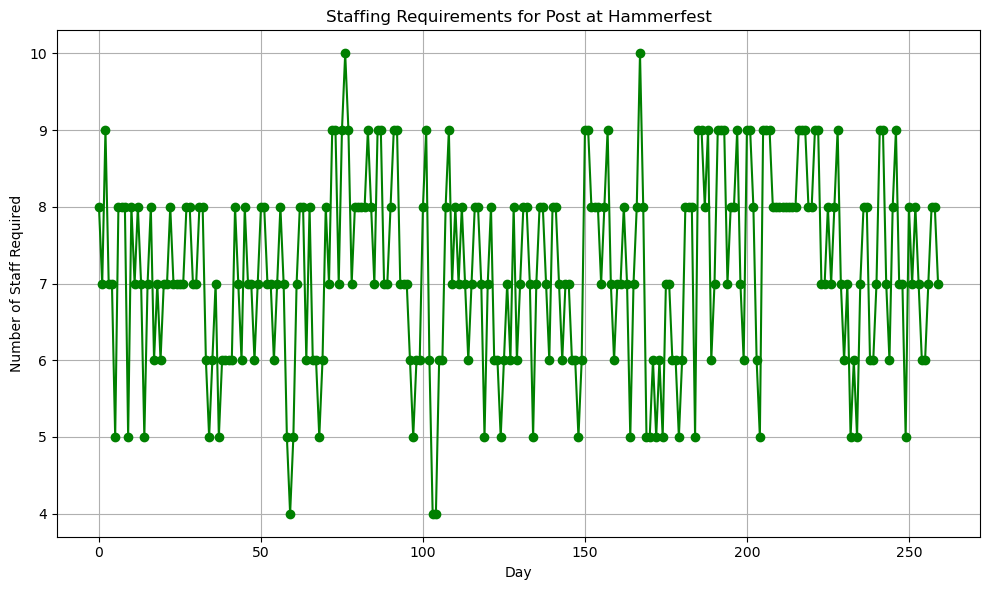

In [29]:
staff_opt_plot(staff_allocated)

## Simulering Skiftdesign for Over- og Underbemanninger

### Input data

In [30]:
data = fin_data
staff_needed = data_opt["staff_allocated"]
staff_needed = pd.Series(staff_needed)
post = "medisinsk"
weekend = False
predictions = False
year = 2023
avg_length_of_stay = 3  # Gjennomsnittlig liggetid (dager)
# patients_per_nurse = 3  # Antall pasienter per sykepleier
shifts_per_day = 3  # Antall skift per dag
iterations = 1000  # Antall simuleringer

## Scenarioer: 1) Helligdager og offentlige eventer, 2) Høytider, 3) Ulykke, 4) Krig, 5) evt. to shift helg istedet for 3 (?)
# Her må det legges til endring i pasientstrøm og belegg pr. dag i functionene direkte, pluss endring i MaxStaff, PPS, availability og service_level (fra optimeringsdelen),
# og avg_length_of_stay, (shifts_per_day) for å simulere de ulike scenarioene  

### Simulering under/overbemannede skift

In [31]:
understaffed_shifts, overstaffed_shifts, total_shifts, staffed_shifts_data = over_under_staffed_shifts(data,
                                                                                                       staff_needed, 
                                                                                                       avg_length_of_stay, 
                                                                                                       shifts_per_day, 
                                                                                                       iterations, 
                                                                                                       post, 
                                                                                                       weekend, 
                                                                                                       predictions, 
                                                                                                       year)


prosent_underbemannet_skift = understaffed_shifts / total_shifts * 100
prosent_overbemannet_skift = overstaffed_shifts / total_shifts * 100

# Resultat: Hvor ofte er skift underbemannet?
print(f"Prosentandel skift med underbemanning: {prosent_underbemannet_skift:.2f}%")
print(f"Prosentandel skift med overbemanning: {prosent_overbemannet_skift:.2f}%")
print(f"Prosentandel skift med riktig bemanning: {(100 - (prosent_underbemannet_skift + prosent_overbemannet_skift)):.2f}%")

Prosentandel skift med underbemanning: 0.77%
Prosentandel skift med overbemanning: 85.38%
Prosentandel skift med riktig bemanning: 13.85%


### Visualiserte resultater

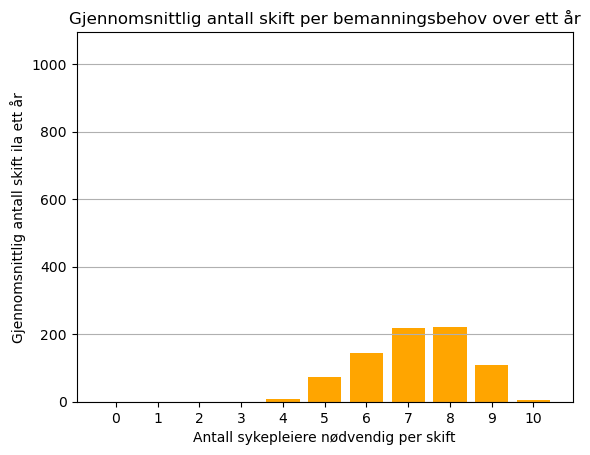

In [33]:
under_over_staffing_plot(staffed_shifts_data, iterations, shifts_per_day)

# Etterspørselsiden

## Monte Carlo Simulering Overbelastning, Belegg, og Ventetid

### Input data

In [34]:
data = fin_data 
post = "medisinsk"
weekend = False
predictions = False
year = 2023
total_beds = 26 #26 medisinsk, 20 kirurgisk 
average_stay = 3 # Normal
num_simulations = 1000
## Scenarioer: 1) Helligdager og offentlige eventer, 2) Høytider, 3) Ulykke, 4) Krig
# Her må det legges til endring i pasientstrøm og belegg pr. dag i functionene direkte, pluss endring i MaxStaff, PPS, availability og service_level (fra optimeringsdelen),
# total_beds, og average_stay for å simulere de ulike scenarioene  

### Simuleringsresultater

In [35]:
data, avg_overload_days, avg_occupancy_percentage, waiting_probability, all_overload_days, all_occupancy_percents = monte_carlo_simulation(fin_data, 
                                                                                                                                           total_beds, 
                                                                                                                                           average_stay, 
                                                                                                                                           num_simulations, 
                                                                                                                                           "medisinsk", 
                                                                                                                                           year = 2023)

# Print resultater
print(f"Gjennomsnittlig antall dager med overbelastning per år: {avg_overload_days:.2f} dager")
print(f"Gjennomsnittlig beleggsprosent over året: {avg_occupancy_percentage:.2f}%")
print(f"Sannsynligheten for at pasienter må vente på en seng: {waiting_probability:.2%}")

Gjennomsnittlig antall dager med overbelastning per år: 56.20 dager
Gjennomsnittlig beleggsprosent over året: 79.87%
Sannsynligheten for at pasienter må vente på en seng: 5.68%


### Visualiserte resultater

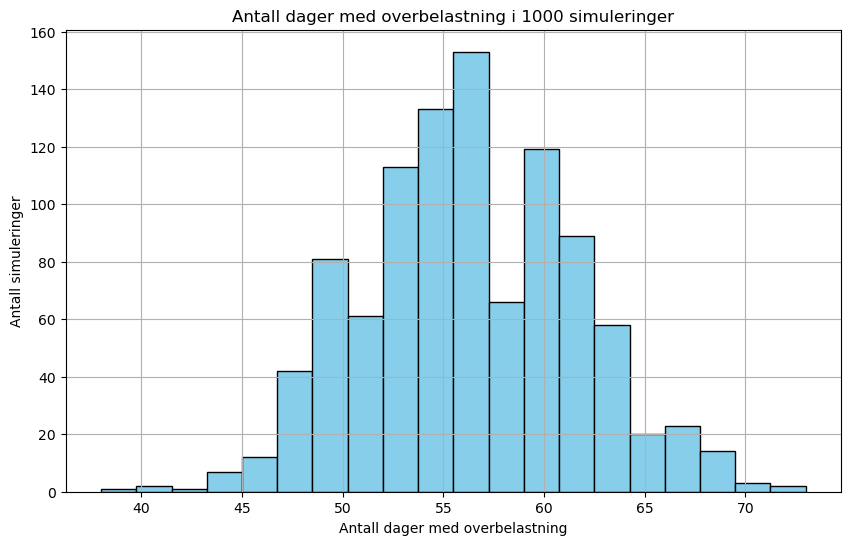

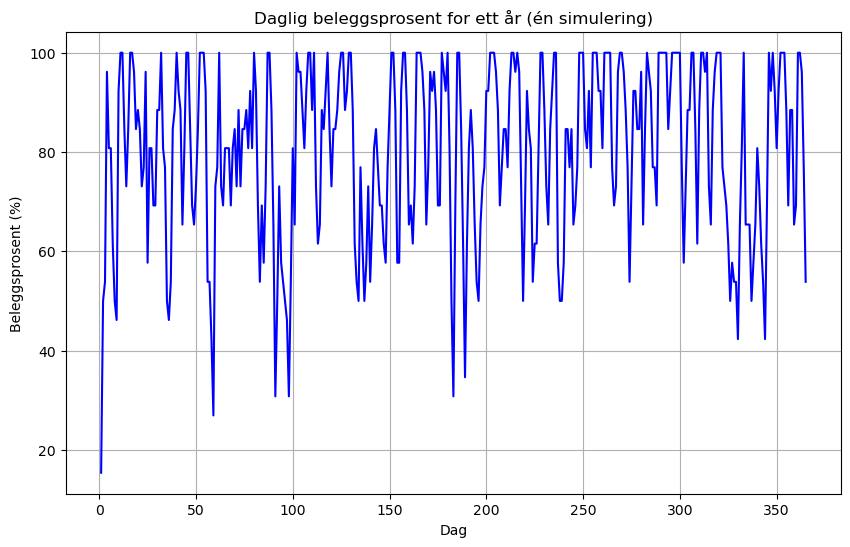

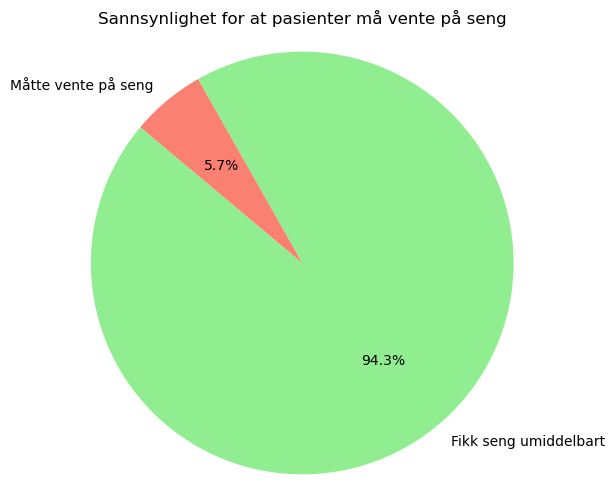

In [36]:
monte_carlo_dager_overbelastning(all_overload_days)
monte_carlo_beleggsprosent(data, all_occupancy_percents)
monte_carlo_waiting_probability(waiting_probability)